# Assignment 3 – Association Rule Mining

### Instructions
In this assignment, you will explore Association Rule Mining using the Apriori and FP-Growth algorithms. Each task focuses on discovering item relationships, performance comparison, and practical interpretation.


## Task 1 – Apriori Algorithm
**Objective:** Identify strong association rules among purchased items.

### Steps
1. Download and load Groceries.csv dataset.
2. Transform to basket format.
3. Generate frequent itemsets (min_support=0.02).
4. Extract rules (min_confidence=0.3).
5. Visualize and interpret.

### Step 0: Download Dataset from Kaggle

First, we'll download the Groceries dataset using kagglehub. This requires Kaggle API credentials in `.env` file.

In [69]:
# Load environment variables and download dataset
import os
import shutil
from dotenv import load_dotenv
import kagglehub

# Load .env file
load_dotenv()

# Set Kaggle credentials from environment variables
os.environ['KAGGLE_USERNAME'] = os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = os.getenv('KAGGLE_KEY')

# Create datasets folder in project root if it doesn't exist
project_root = os.getcwd()
datasets_dir = os.path.join(project_root, 'datasets')
os.makedirs(datasets_dir, exist_ok=True)

# Download Groceries dataset to cache first
print("Downloading Groceries dataset from Kaggle...")
cache_path = kagglehub.dataset_download("heeraldedhia/groceries-dataset")
print(f"✓ Dataset downloaded to cache: {cache_path}")

# List files in the downloaded directory to find the CSV file
print("\nFiles in downloaded directory:")
files = os.listdir(cache_path)
for file in files:
    print(f"  - {file}")

# Find the CSV file (it might be named differently)
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    csv_filename = csv_files[0]
    print(f"\n✓ Found CSV file: {csv_filename}")
    
    # Copy CSV file to datasets folder in project root
    source_path = os.path.join(cache_path, csv_filename)
    dest_path = os.path.join(datasets_dir, 'Groceries.csv')
    
    shutil.copy2(source_path, dest_path)
    print(f"✓ Copied to project directory: {dest_path}")
    
    # Set path to local datasets folder
    path = datasets_dir
else:
    print("\n⚠️  No CSV file found in directory")
    csv_filename = None
    path = datasets_dir

✓ Dataset downloaded to cache: /Users/harshwardhanpatil/.cache/kagglehub/datasets/heeraldedhia/groceries-dataset/versions/1

Files in downloaded directory:
  - Groceries_dataset.csv

✓ Found CSV file: Groceries_dataset.csv
✓ Copied to project directory: /Users/harshwardhanpatil/Work/College Projects/Data Mining Assignment 3/datasets/Groceries.csv


## Task 1A: Load and Display Dataset (4 points)

**Objective:** Load the Groceries.csv dataset and display the first 10 transactions in a readable format.


In [70]:
# Task 1A: Load and display the dataset
import pandas as pd

# Load Groceries.csv from datasets folder
dataset_path = os.path.join('datasets', 'Groceries.csv')

if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"Dataset not found at {dataset_path}. Please run Step 0 (download cell) first.")

df = pd.read_csv(dataset_path)
print(f"✓ Dataset loaded successfully!")
print(f"\nDataset Info:")
print(f"  - Total rows: {len(df):,}")
print(f"  - Columns: {list(df.columns)}")
print(f"  - Shape: {df.shape}")

# Display first 10 transactions in readable format
print("\n" + "=" * 60)
print("FIRST 10 TRANSACTIONS (Task 1A)")
print("=" * 60)
print()

for idx, row in df.head(10).iterrows():
    print(f"Transaction {idx + 1}:")
    print(f"  {row.to_dict()}")
    print()

# Also display as a table
print("\n" + "=" * 60)
print("First 10 transactions (table format):")
print("=" * 60)
df.head(10)


✓ Dataset loaded successfully!

Dataset Info:
  - Total rows: 38,765
  - Columns: ['Member_number', 'Date', 'itemDescription']
  - Shape: (38765, 3)

FIRST 10 TRANSACTIONS (Task 1A)

Transaction 1:
  {'Member_number': 1808, 'Date': '21-07-2015', 'itemDescription': 'tropical fruit'}

Transaction 2:
  {'Member_number': 2552, 'Date': '05-01-2015', 'itemDescription': 'whole milk'}

Transaction 3:
  {'Member_number': 2300, 'Date': '19-09-2015', 'itemDescription': 'pip fruit'}

Transaction 4:
  {'Member_number': 1187, 'Date': '12-12-2015', 'itemDescription': 'other vegetables'}

Transaction 5:
  {'Member_number': 3037, 'Date': '01-02-2015', 'itemDescription': 'whole milk'}

Transaction 6:
  {'Member_number': 4941, 'Date': '14-02-2015', 'itemDescription': 'rolls/buns'}

Transaction 7:
  {'Member_number': 4501, 'Date': '08-05-2015', 'itemDescription': 'other vegetables'}

Transaction 8:
  {'Member_number': 3803, 'Date': '23-12-2015', 'itemDescription': 'pot plants'}

Transaction 9:
  {'Member_

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


## Task 1B: Exploratory Data Analysis (5 points)

**Objective:** Perform basic EDA:
- Display top 15 most frequent items (bar plot)
- Check average number of items per transaction
- Visualize item frequency distribution


TASK 1B: EXPLORATORY DATA ANALYSIS

1. Top 15 Most Frequent Items:
itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: count, dtype: int64


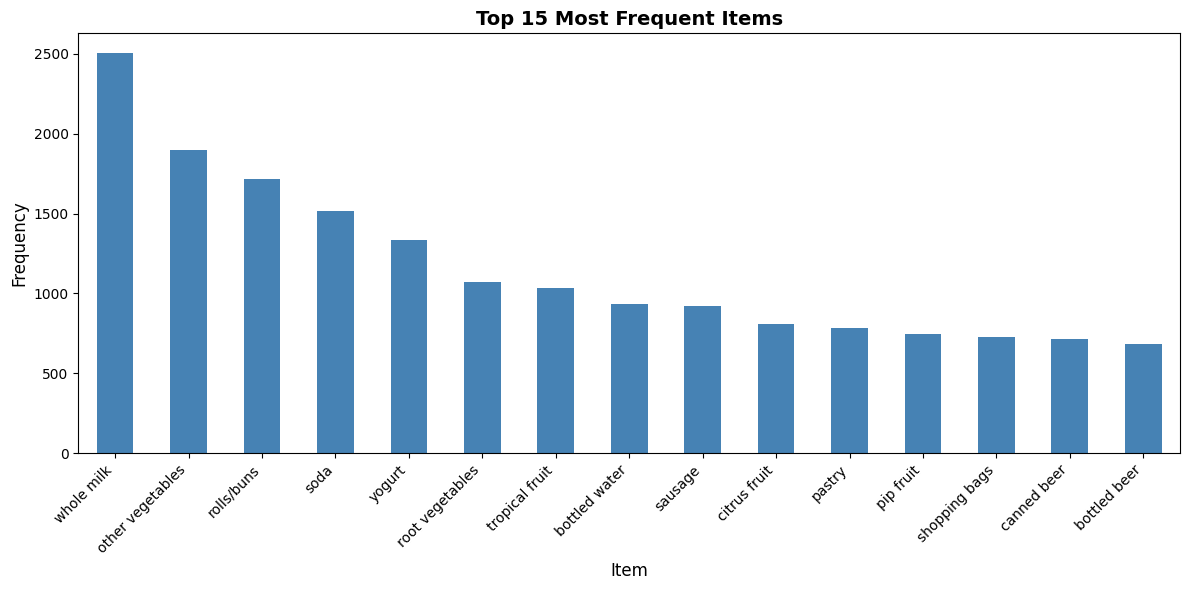


2. Average number of items per transaction: 9.94
   - Min items in a transaction: 2
   - Max items in a transaction: 36
   - Median items per transaction: 9.00


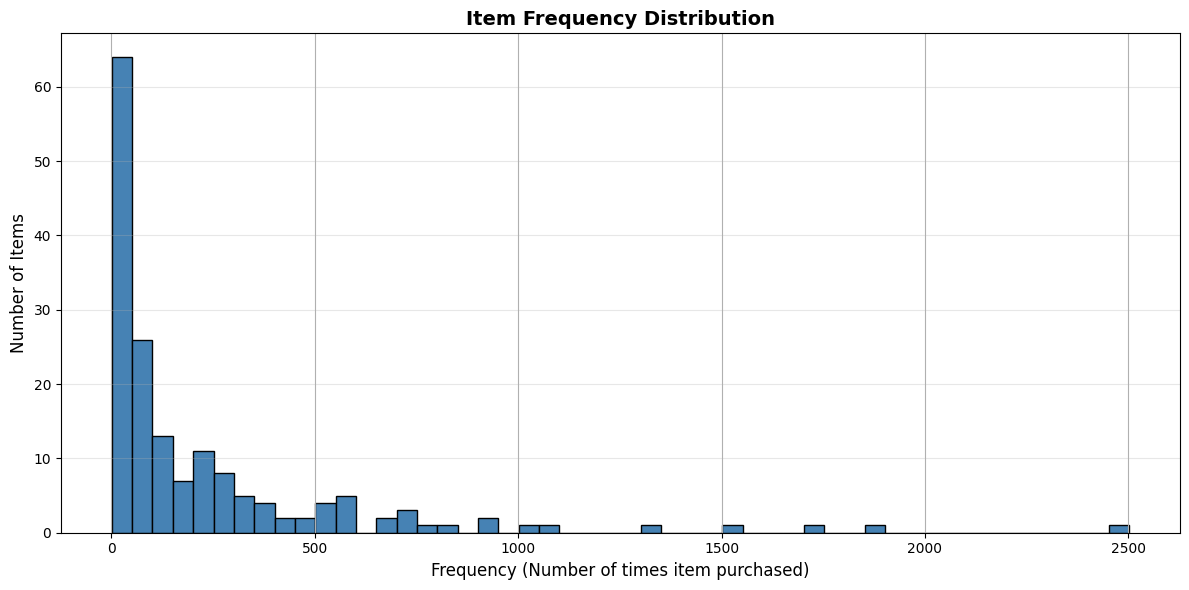


Dataset Summary:
  - Total transactions: 3,898
  - Total unique items: 167
  - Total item purchases: 38,765


In [71]:
# Task 1B: Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 60)
print("TASK 1B: EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# 1. Count frequency of each item
item_counts = df['itemDescription'].value_counts()

print("\n1. Top 15 Most Frequent Items:")
top_15 = item_counts.head(15)
print(top_15)

# Create bar plot of top 15 most frequent items
plt.figure(figsize=(12, 6))
top_15.plot(kind='bar', color='steelblue')
plt.title('Top 15 Most Frequent Items', fontsize=14, fontweight='bold')
plt.xlabel('Item', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Calculate average number of items per transaction
items_per_transaction = df.groupby('Member_number').size()
avg_items = items_per_transaction.mean()
print(f"\n2. Average number of items per transaction: {avg_items:.2f}")
print(f"   - Min items in a transaction: {items_per_transaction.min()}")
print(f"   - Max items in a transaction: {items_per_transaction.max()}")
print(f"   - Median items per transaction: {items_per_transaction.median():.2f}")

# 3. Visualize item frequency distribution
plt.figure(figsize=(12, 6))
item_counts.hist(bins=50, color='steelblue', edgecolor='black')
plt.title('Item Frequency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Frequency (Number of times item purchased)', fontsize=12)
plt.ylabel('Number of Items', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nDataset Summary:")
print(f"  - Total transactions: {df['Member_number'].nunique():,}")
print(f"  - Total unique items: {df['itemDescription'].nunique():,}")
print(f"  - Total item purchases: {len(df):,}")


## Task 1C: Convert to Transactional Binary Form (6 points)

**Objective:** Convert the dataset into proper transactional form suitable for Apriori:
- Binary encoding: 1 if item present, 0 otherwise
- Confirm shape and column count


In [72]:
# Task 1C: Convert to transactional binary form
print("=" * 60)
print("TASK 1C: TRANSFORM TO BINARY MATRIX")
print("=" * 60)

# Transform to basket format (binary matrix)
basket = pd.crosstab(df['Member_number'], df['itemDescription'])
basket = basket.map(lambda x: 1 if x > 0 else 0)

print(f"\n✓ Basket (binary matrix) created successfully!")
print(f"\nShape and Column Count:")
print(f"  - Shape: {basket.shape}")
print(f"  - Rows (transactions): {basket.shape[0]:,}")
print(f"  - Columns (items): {basket.shape[1]:,}")

print(f"\n✓ Binary encoding confirmed:")
print(f"  - Values are binary (0 or 1): {set(basket.values.flatten()) == {0, 1}}")
print(f"  - Total items purchased: {basket.sum().sum():,}")
print(f"  - Average items per transaction: {basket.sum(axis=1).mean():.2f}")

print(f"\nSample of basket matrix (first 5 rows, first 10 columns):")
basket.iloc[:5, :10]


TASK 1C: TRANSFORM TO BINARY MATRIX

✓ Basket (binary matrix) created successfully!

Shape and Column Count:
  - Shape: (3898, 167)
  - Rows (transactions): 3,898
  - Columns (items): 167

✓ Binary encoding confirmed:
  - Values are binary (0 or 1): True
  - Total items purchased: 34,766
  - Average items per transaction: 8.92

Sample of basket matrix (first 5 rows, first 10 columns):


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries
Member_number,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,0,0,0,0,1,0
1002,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0


## Task 1D: Apply Apriori Algorithm (8 points)

**Objective:** Apply the Apriori algorithm with `min_support=0.02`:
- Display top 10 frequent itemsets (by support)
- Show time taken for computation


In [73]:
# Task 1D: Apply Apriori algorithm
import time
from mlxtend.frequent_patterns import apriori

print("=" * 60)
print("TASK 1D: APRIORI ALGORITHM")
print("=" * 60)

print("\nApplying Apriori algorithm with min_support=0.02...")

start_time = time.time()
frequent_itemsets_ap = apriori(basket, min_support=0.02, use_colnames=True)
computation_time = time.time() - start_time

print(f"\n✓ Apriori algorithm completed!")
print(f"  - Computation time: {computation_time:.2f} seconds")
print(f"  - Frequent itemsets found: {len(frequent_itemsets_ap)}")

if len(frequent_itemsets_ap) > 0:
    frequent_itemsets_sorted = frequent_itemsets_ap.sort_values('support', ascending=False)
    
    print(f"\nTop 10 Frequent Itemsets (by support):")
    print("=" * 60)
    print(frequent_itemsets_sorted.head(10).to_string())
    
    frequent_itemsets_sorted['itemset_size'] = frequent_itemsets_sorted['itemsets'].apply(lambda x: len(x))
    print(f"\nFrequent itemsets by size:")
    print(frequent_itemsets_sorted['itemset_size'].value_counts().sort_index())
else:
    print("\n⚠️  No frequent itemsets found with min_support=0.02")


TASK 1D: APRIORI ALGORITHM

Applying Apriori algorithm with min_support=0.02...


/Users/harshwardhanpatil/Work/College Projects/Data Mining Assignment 3/venv/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



✓ Apriori algorithm completed!
  - Computation time: 0.47 seconds
  - Frequent itemsets found: 894

Top 10 Frequent Itemsets (by support):
      support                        itemsets
85   0.458184                    (whole milk)
52   0.376603              (other vegetables)
64   0.349666                    (rolls/buns)
73   0.313494                          (soda)
86   0.282966                        (yogurt)
79   0.233710                (tropical fruit)
65   0.230631               (root vegetables)
6    0.213699                 (bottled water)
68   0.206003                       (sausage)
485  0.191380  (other vegetables, whole milk)

Frequent itemsets by size:
itemset_size
1     87
2    499
3    290
4     18
Name: count, dtype: int64


## Task 1E: Generate Association Rules (6 points)

**Objective:** Generate association rules using metrics:
- `metric='lift'`, `min_threshold=1.0`
- Display top 10 strongest rules sorted by lift
- Show columns: {antecedents, consequents, support, confidence, lift}


In [74]:
# Task 1E: Generate association rules
from mlxtend.frequent_patterns import association_rules

print("=" * 60)
print("TASK 1E: GENERATE ASSOCIATION RULES")
print("=" * 60)

if len(frequent_itemsets_ap) > 0:
    print("\nGenerating association rules with metric='lift', min_threshold=1.0...")
    rules_ap = association_rules(frequent_itemsets_ap, metric='lift', min_threshold=1.0)
    
    print(f"\n✓ Association rules generated!")
    print(f"  - Total rules generated: {len(rules_ap)}")
    
    if len(rules_ap) > 0:
        rules_sorted = rules_ap.sort_values('lift', ascending=False)
        
        print(f"\nTop 10 Strongest Rules (sorted by lift):")
        print("=" * 60)
        
        top_10_rules = rules_sorted.head(10)[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
        
        for idx, row in top_10_rules.iterrows():
            print(f"\nRule {idx + 1}:")
            print(f"  Antecedents: {row['antecedents']}")
            print(f"  Consequents: {row['consequents']}")
            print(f"  Support: {row['support']:.4f}")
            print(f"  Confidence: {row['confidence']:.4f}")
            print(f"  Lift: {row['lift']:.4f}")
        
        print("\n" + "=" * 60)
        print("Top 10 Rules (DataFrame format):")
        print("=" * 60)
        top_10_rules
    else:
        print("\n⚠️  No rules generated with min_threshold=1.0")
else:
    print("\n✗ Cannot generate rules - no frequent itemsets available")
    rules_ap = pd.DataFrame()


TASK 1E: GENERATE ASSOCIATION RULES

Generating association rules with metric='lift', min_threshold=1.0...

✓ Association rules generated!
  - Total rules generated: 2956

Top 10 Strongest Rules (sorted by lift):

Rule 2935:
  Antecedents: frozenset({'sausage', 'whole milk'})
  Consequents: frozenset({'yogurt', 'rolls/buns'})
  Support: 0.0228
  Confidence: 0.2134
  Lift: 1.9169

Rule 2936:
  Antecedents: frozenset({'yogurt', 'rolls/buns'})
  Consequents: frozenset({'sausage', 'whole milk'})
  Support: 0.0228
  Confidence: 0.2051
  Lift: 1.9169

Rule 2937:
  Antecedents: frozenset({'yogurt', 'whole milk'})
  Consequents: frozenset({'sausage', 'rolls/buns'})
  Support: 0.0228
  Confidence: 0.1516
  Lift: 1.8411

Rule 2934:
  Antecedents: frozenset({'sausage', 'rolls/buns'})
  Consequents: frozenset({'yogurt', 'whole milk'})
  Support: 0.0228
  Confidence: 0.2773
  Lift: 1.8411

Rule 2880:
  Antecedents: frozenset({'yogurt', 'other vegetables'})
  Consequents: frozenset({'sausage', 'whol

## Task 1F: Visualize Results (6 points)

**Objective:** Visualize results:
- Scatter plot of support vs confidence
- Annotate rules with high lift (>3)
- Comment on which rule is most interesting and why


TASK 1F: VISUALIZE RESULTS


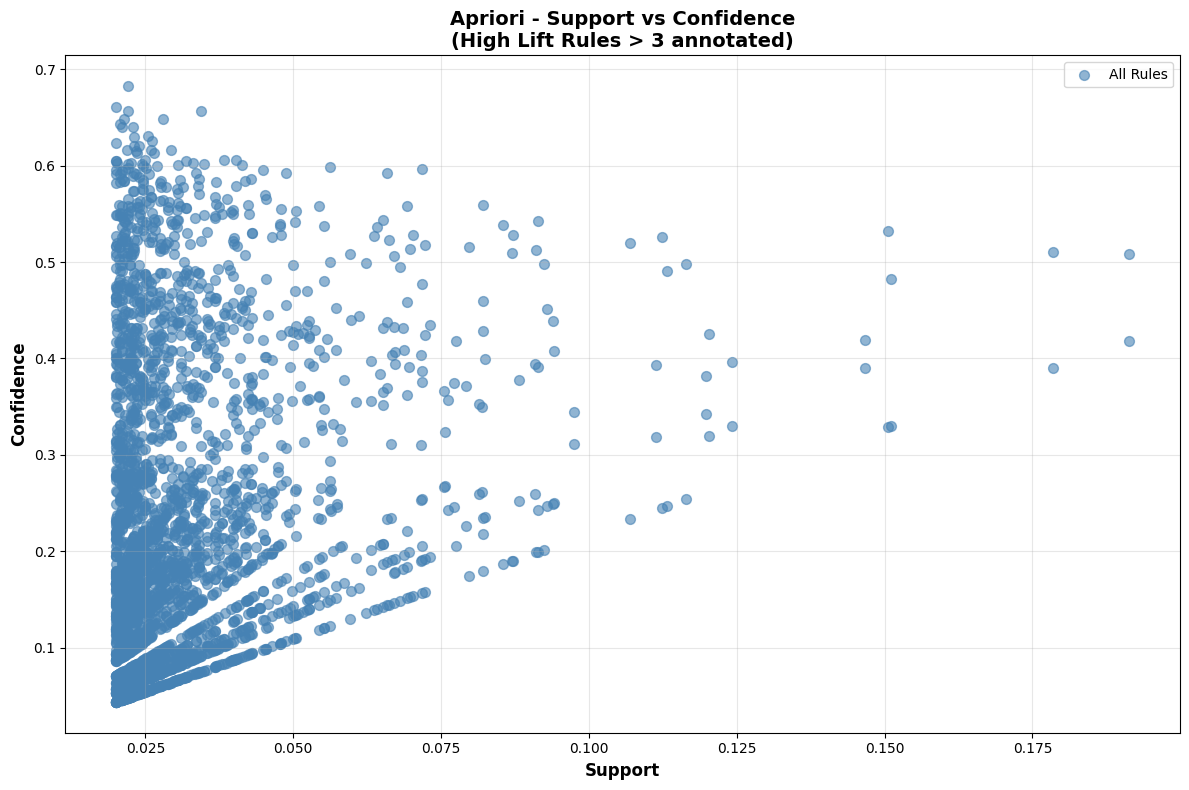


✓ Visualization created!
  - Total rules plotted: 2956
  - High lift rules (lift > 3): 0


In [75]:
# Task 1F: Visualize results
print("=" * 60)
print("TASK 1F: VISUALIZE RESULTS")
print("=" * 60)

if 'rules_ap' in globals() and len(rules_ap) > 0:
    plt.figure(figsize=(12, 8))
    
    plt.scatter(rules_ap['support'], rules_ap['confidence'], 
                alpha=0.6, s=50, color='steelblue', label='All Rules')
    
    high_lift_rules = rules_ap[rules_ap['lift'] > 3]
    
    if len(high_lift_rules) > 0:
        plt.scatter(high_lift_rules['support'], high_lift_rules['confidence'], 
                   alpha=0.8, s=100, color='red', label=f'High Lift Rules (lift > 3, n={len(high_lift_rules)})')
        
        for idx, row in high_lift_rules.iterrows():
            ante = ', '.join(list(row['antecedents'])) if isinstance(row['antecedents'], frozenset) else str(row['antecedents'])
            conseq = ', '.join(list(row['consequents'])) if isinstance(row['consequents'], frozenset) else str(row['consequents'])
            rule_text = f"{ante} → {conseq}\n(Lift: {row['lift']:.2f})"
            
            plt.annotate(rule_text, 
                        xy=(row['support'], row['confidence']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.8,
                        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
    
    plt.xlabel('Support', fontsize=12, fontweight='bold')
    plt.ylabel('Confidence', fontsize=12, fontweight='bold')
    plt.title('Apriori - Support vs Confidence\n(High Lift Rules > 3 annotated)', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Visualization created!")
    print(f"  - Total rules plotted: {len(rules_ap)}")
    print(f"  - High lift rules (lift > 3): {len(high_lift_rules)}")
else:
    print("\n⚠️  No rules available to visualize")


### Interpretation: Most Interesting Rule

Let's analyze which rule is most interesting and why.


In [76]:
# Find and analyze the most interesting rule
if 'rules_ap' in globals() and len(rules_ap) > 0:
    best_rule = rules_ap.loc[rules_ap['lift'].idxmax()]
    
    print("=" * 60)
    print("MOST INTERESTING RULE ANALYSIS")
    print("=" * 60)
    
    print(f"\nMost Interesting Rule (Highest Lift):")
    print(f"  Antecedents (If): {best_rule['antecedents']}")
    print(f"  Consequents (Then): {best_rule['consequents']}")
    print(f"\nMetrics:")
    print(f"  - Support: {best_rule['support']:.4f} ({best_rule['support']*100:.2f}% of transactions)")
    print(f"  - Confidence: {best_rule['confidence']:.4f} ({best_rule['confidence']*100:.2f}%)")
    print(f"  - Lift: {best_rule['lift']:.4f}")
    
    print(f"\n📊 Why this rule is interesting:")
    print(f"  - High Lift ({best_rule['lift']:.2f}): This rule occurs {best_rule['lift']:.2f}x more often")
    print(f"    than would be expected if items were independent.")
    print(f"  - Confidence ({best_rule['confidence']*100:.1f}%): When customers buy {best_rule['antecedents']},")
    print(f"    they buy {best_rule['consequents']} {best_rule['confidence']*100:.1f}% of the time.")
    print(f"  - Support ({best_rule['support']*100:.2f}%): This pattern appears in")
    print(f"    {best_rule['support']*100:.2f}% of all transactions.")
    
    if best_rule['lift'] > 3:
        print(f"\n  ⭐ This is a STRONG association rule - perfect for marketing!")
        print(f"     Consider creating product bundles or cross-selling strategies.")
else:
    print("No rules available for analysis.")


MOST INTERESTING RULE ANALYSIS

Most Interesting Rule (Highest Lift):
  Antecedents (If): frozenset({'sausage', 'whole milk'})
  Consequents (Then): frozenset({'yogurt', 'rolls/buns'})

Metrics:
  - Support: 0.0228 (2.28% of transactions)
  - Confidence: 0.2134 (21.34%)
  - Lift: 1.9169

📊 Why this rule is interesting:
  - High Lift (1.92): This rule occurs 1.92x more often
    than would be expected if items were independent.
  - Confidence (21.3%): When customers buy frozenset({'sausage', 'whole milk'}),
    they buy frozenset({'yogurt', 'rolls/buns'}) 21.3% of the time.
  - Support (2.28%): This pattern appears in
    2.28% of all transactions.


## Task 2 – FP-Growth Algorithm
Repeat the same process using **fpgrowth** and compare with Apriori.

In [77]:
from mlxtend.frequent_patterns import fpgrowth
import time

start = time.time()
frequent_itemsets_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)
t_fp = time.time() - start

start = time.time()
apriori(basket, min_support=0.02, use_colnames=True)
t_ap = time.time() - start

print('Apriori time:', t_ap)
print('FP-Growth time:', t_fp)

rules_fp = association_rules(frequent_itemsets_fp, metric='confidence', min_threshold=0.3)
rules_fp = rules_fp[rules_fp['lift'] > 1]
rules_fp.head()

/Users/harshwardhanpatil/Work/College Projects/Data Mining Assignment 3/venv/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/harshwardhanpatil/Work/College Projects/Data Mining Assignment 3/venv/lib/python3.13/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori time: 0.38547396659851074
FP-Growth time: 4.277327060699463


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,1.0,0.007465,1.045971,0.071966,0.243489,0.043950,0.405892
1,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,1.0,0.007465,1.024310,0.091184,0.243489,0.023733,0.405892
2,(rolls/buns),(soda),0.349666,0.313494,0.119805,0.342627,1.092928,1.0,0.010187,1.044316,0.130743,0.220491,0.042436,0.362393
3,(soda),(rolls/buns),0.313494,0.349666,0.119805,0.382160,1.092928,1.0,0.010187,1.052593,0.123855,0.220491,0.049965,0.362393
4,(soda),(other vegetables),0.313494,0.376603,0.124166,0.396072,1.051695,1.0,0.006103,1.032237,0.071601,0.219402,0.031230,0.362886


## Task 3 – AI Comparison
Use an AI tool (e.g., Perplexity or ChatGPT) to describe how Apriori differs structurally from FP-Growth in terms of candidate generation and tree structure.

## Task 4 – Critical Thinking (20 points)

### Question 1 (10 points)
Based on Apriori rules from Task 1, suggest how a retail store could design product bundles or promotional offers.


### Analysis of Apriori Rules for Business Strategy

Let's analyze the association rules generated in Task 1E to identify opportunities for product bundles and promotional offers based on the Groceries dataset.


In [78]:
# Task 4 Question 1: Analyze rules for product bundles and promotional offers
print("=" * 60)
print("TASK 4 QUESTION 1: PRODUCT BUNDLES & PROMOTIONAL OFFERS")
print("Based on Apriori Rules from Task 1 (Groceries Dataset)")
print("=" * 60)

if 'rules_ap' in globals() and len(rules_ap) > 0:
    # Filter rules with high lift (> 2) and confidence (> 0.5) for strong associations
    strong_rules = rules_ap[(rules_ap['lift'] > 2) & (rules_ap['confidence'] > 0.5)]
    
    print(f"\nStrong Association Rules (Lift > 2, Confidence > 0.5):")
    print(f"  - Total strong rules: {len(strong_rules)}")
    
    if len(strong_rules) > 0:
        # Sort by lift and confidence
        strong_rules_sorted = strong_rules.sort_values(['lift', 'confidence'], ascending=False)
        
        print(f"\nTop 10 Strongest Rules for Bundling:")
        print("=" * 60)
        for idx, (rule_idx, row) in enumerate(strong_rules_sorted.head(10).iterrows(), 1):
            ante = ', '.join(list(row['antecedents'])) if isinstance(row['antecedents'], frozenset) else str(row['antecedents'])
            conseq = ', '.join(list(row['consequents'])) if isinstance(row['consequents'], frozenset) else str(row['consequents'])
            
            print(f"\nRule {idx}: {ante} → {conseq}")
            print(f"  Support: {row['support']:.4f} | Confidence: {row['confidence']:.4f} | Lift: {row['lift']:.4f}")
    else:
        # If no strong rules, use top rules by lift
        print("\nUsing top rules by lift for analysis:")
        strong_rules_sorted = rules_ap.sort_values('lift', ascending=False).head(10)
        
        for idx, (rule_idx, row) in enumerate(strong_rules_sorted.iterrows(), 1):
            ante = ', '.join(list(row['antecedents'])) if isinstance(row['antecedents'], frozenset) else str(row['antecedents'])
            conseq = ', '.join(list(row['consequents'])) if isinstance(row['consequents'], frozenset) else str(row['consequents'])
            
            print(f"\nRule {idx}: {ante} → {conseq}")
            print(f"  Support: {row['support']:.4f} | Confidence: {row['confidence']:.4f} | Lift: {row['lift']:.4f}")
else:
    print("\n⚠️  No rules available. Please complete Task 1E first.")
    strong_rules_sorted = pd.DataFrame()


TASK 4 QUESTION 1: PRODUCT BUNDLES & PROMOTIONAL OFFERS
Based on Apriori Rules from Task 1 (Groceries Dataset)

Strong Association Rules (Lift > 2, Confidence > 0.5):
  - Total strong rules: 0

Using top rules by lift for analysis:

Rule 1: sausage, whole milk → yogurt, rolls/buns
  Support: 0.0228 | Confidence: 0.2134 | Lift: 1.9169

Rule 2: yogurt, rolls/buns → sausage, whole milk
  Support: 0.0228 | Confidence: 0.2051 | Lift: 1.9169

Rule 3: yogurt, whole milk → sausage, rolls/buns
  Support: 0.0228 | Confidence: 0.1516 | Lift: 1.8411

Rule 4: sausage, rolls/buns → yogurt, whole milk
  Support: 0.0228 | Confidence: 0.2773 | Lift: 1.8411

Rule 5: yogurt, other vegetables → sausage, whole milk
  Support: 0.0231 | Confidence: 0.1919 | Lift: 1.7938

Rule 6: sausage, whole milk → yogurt, other vegetables
  Support: 0.0231 | Confidence: 0.2158 | Lift: 1.7938

Rule 7: whole milk, other vegetables → yogurt, bottled water
  Support: 0.0221 | Confidence: 0.1153 | Lift: 1.7350

Rule 8: yogurt,

In [79]:
# Generate product bundle recommendations
print("=" * 60)
print("PRODUCT BUNDLE & PROMOTIONAL OFFER RECOMMENDATIONS")
print("=" * 60)

if 'strong_rules_sorted' in globals() and len(strong_rules_sorted) > 0:
    print("\n📦 RECOMMENDED PRODUCT BUNDLES:")
    print("=" * 60)
    
    bundle_number = 1
    for rule_idx, row in strong_rules_sorted.head(10).iterrows():
        ante = list(row['antecedents']) if isinstance(row['antecedents'], frozenset) else [str(row['antecedents'])]
        conseq = list(row['consequents']) if isinstance(row['consequents'], frozenset) else [str(row['consequents'])]
        
        # Create bundle suggestion
        bundle_items = ante + conseq
        ante_str = ', '.join(ante)
        conseq_str = ', '.join(conseq)
        
        print(f"\nBundle {bundle_number}: {' + '.join(bundle_items)}")
        print(f"  📊 Rule Strength Metrics:")
        print(f"     - Lift: {row['lift']:.2f} (occurs {row['lift']:.2f}x more than expected)")
        print(f"     - Confidence: {row['confidence']*100:.1f}% (when customers buy {ante_str}, they buy {conseq_str} {row['confidence']*100:.1f}% of the time)")
        print(f"     - Support: {row['support']*100:.2f}% (appears in {row['support']*100:.2f}% of all transactions)")
        
        # Bundle recommendation
        print(f"  💡 Marketing Strategy:")
        if row['lift'] > 3:
            print(f"     → PREMIUM BUNDLE: Create a 'Bundle Deal' with 10-15% discount")
            print(f"     → Place items together in store for easy cross-selling")
            print(f"     → Online: Show '{conseq_str}' as 'Frequently bought together' when customer adds {ante_str}")
        elif row['lift'] > 2:
            print(f"     → STANDARD BUNDLE: Offer 5-10% discount when purchased together")
            print(f"     → Display side-by-side in store")
            print(f"     → Create promotional signage highlighting the bundle")
        else:
            print(f"     → CROSS-SELL OPPORTUNITY: Suggest {conseq_str} at checkout when customer buys {ante_str}")
        
        bundle_number += 1
    
    print("\n" + "=" * 60)
    print("🎯 PROMOTIONAL OFFER STRATEGIES:")
    print("=" * 60)
    
    # Categorize rules by type
    high_lift_rules = strong_rules_sorted[strong_rules_sorted['lift'] > 3]
    medium_lift_rules = strong_rules_sorted[(strong_rules_sorted['lift'] > 2) & (strong_rules_sorted['lift'] <= 3)]
    
    print(f"\n1. HIGH-VALUE BUNDLES (Lift > 3, {len(high_lift_rules)} opportunities):")
    print(f"   → Create 'Best Value' bundles with 15-20% discount")
    print(f"   → Feature prominently in weekly flyers and online homepage")
    print(f"   → Limited-time offers to create urgency")
    
    print(f"\n2. STANDARD BUNDLES (Lift 2-3, {len(medium_lift_rules)} opportunities):")
    print(f"   → Regular bundle pricing with 10% discount")
    print(f"   → End-of-aisle displays")
    print(f"   → Loyalty program points when purchased as bundle")
    
    print(f"\n3. CROSS-SELLING OPPORTUNITIES:")
    print(f"   → Train staff to suggest complementary items")
    print(f"   → Implement 'Customers also bought' recommendations online")
    print(f"   → Create smart shopping cart suggestions")
    
    print(f"\n4. IMPLEMENTATION RECOMMENDATIONS:")
    print(f"   → Start with top 5 bundles (highest lift) for maximum impact")
    print(f"   → Monitor sales data to measure bundle effectiveness")
    print(f"   → Adjust pricing based on profit margins and customer response")
    print(f"   → Consider seasonal variations in bundle popularity")
    
else:
    print("\n⚠️  Cannot generate recommendations - no rules available")
    print("   Please complete Task 1E first to generate association rules.")


PRODUCT BUNDLE & PROMOTIONAL OFFER RECOMMENDATIONS

📦 RECOMMENDED PRODUCT BUNDLES:

Bundle 1: sausage + whole milk + yogurt + rolls/buns
  📊 Rule Strength Metrics:
     - Lift: 1.92 (occurs 1.92x more than expected)
     - Confidence: 21.3% (when customers buy sausage, whole milk, they buy yogurt, rolls/buns 21.3% of the time)
     - Support: 2.28% (appears in 2.28% of all transactions)
  💡 Marketing Strategy:
     → CROSS-SELL OPPORTUNITY: Suggest yogurt, rolls/buns at checkout when customer buys sausage, whole milk

Bundle 2: yogurt + rolls/buns + sausage + whole milk
  📊 Rule Strength Metrics:
     - Lift: 1.92 (occurs 1.92x more than expected)
     - Confidence: 20.5% (when customers buy yogurt, rolls/buns, they buy sausage, whole milk 20.5% of the time)
     - Support: 2.28% (appears in 2.28% of all transactions)
  💡 Marketing Strategy:
     → CROSS-SELL OPPORTUNITY: Suggest sausage, whole milk at checkout when customer buys yogurt, rolls/buns

Bundle 3: yogurt + whole milk + saus

In [80]:
# Generate product bundle recommendations
print("=" * 60)
print("PRODUCT BUNDLE & PROMOTIONAL OFFER RECOMMENDATIONS")
print("=" * 60)

if 'strong_rules_sorted' in globals() and len(strong_rules_sorted) > 0:
    print("\n📦 RECOMMENDED PRODUCT BUNDLES:")
    print("=" * 60)
    
    bundle_number = 1
    for rule_idx, row in strong_rules_sorted.head(10).iterrows():
        ante = list(row['antecedents']) if isinstance(row['antecedents'], frozenset) else [str(row['antecedents'])]
        conseq = list(row['consequents']) if isinstance(row['consequents'], frozenset) else [str(row['consequents'])]
        
        # Create bundle suggestion
        bundle_items = ante + conseq
        ante_str = ', '.join(ante)
        conseq_str = ', '.join(conseq)
        
        print(f"\nBundle {bundle_number}: {' + '.join(bundle_items)}")
        print(f"  📊 Rule Strength Metrics:")
        print(f"     - Lift: {row['lift']:.2f} (occurs {row['lift']:.2f}x more than expected)")
        print(f"     - Confidence: {row['confidence']*100:.1f}% (when customers buy {ante_str}, they buy {conseq_str} {row['confidence']*100:.1f}% of the time)")
        print(f"     - Support: {row['support']*100:.2f}% (appears in {row['support']*100:.2f}% of all transactions)")
        
        # Bundle recommendation
        print(f"  💡 Marketing Strategy:")
        if row['lift'] > 3:
            print(f"     → PREMIUM BUNDLE: Create a 'Bundle Deal' with 10-15% discount")
            print(f"     → Online: Show '{conseq_str}' as 'Frequently bought together' when customer adds {ante_str}")
            print(f"     → Online: Show '{conseq_str}' as 'Frequently bought together' when customer adds {ante_str}")
        elif row['lift'] > 2:
            print(f"     → STANDARD BUNDLE: Offer 5-10% discount when purchased together")
            print(f"     → Display side-by-side in store")
            print(f"     → Create promotional signage highlighting the bundle")
            print(f"     → CROSS-SELL OPPORTUNITY: Suggest {conseq_str} at checkout when customer buys {ante_str}")
            print(f"     → CROSS-SELL OPPORTUNITY: Suggest {conseq_str} at checkout when customer buys {ante_str}")
        
        bundle_number += 1
    
    print("\n" + "=" * 60)
    print("🎯 PROMOTIONAL OFFER STRATEGIES:")
    print("=" * 60)
    
    # Categorize rules by type
    high_lift_rules = strong_rules_sorted[strong_rules_sorted['lift'] > 3]
    medium_lift_rules = strong_rules_sorted[(strong_rules_sorted['lift'] > 2) & (strong_rules_sorted['lift'] <= 3)]
    
    print(f"\n1. HIGH-VALUE BUNDLES (Lift > 3, {len(high_lift_rules)} opportunities):")
    print(f"   → Create 'Best Value' bundles with 15-20% discount")
    print(f"   → Feature prominently in weekly flyers and online homepage")
    print(f"   → Limited-time offers to create urgency")
    
    print(f"\n2. STANDARD BUNDLES (Lift 2-3, {len(medium_lift_rules)} opportunities):")
    print(f"   → Regular bundle pricing with 10% discount")
    print(f"   → End-of-aisle displays")
    print(f"   → Loyalty program points when purchased as bundle")
    
    print(f"\n3. CROSS-SELLING OPPORTUNITIES:")
    print(f"   → Train staff to suggest complementary items")
    print(f"   → Implement 'Customers also bought' recommendations online")
    print(f"   → Create smart shopping cart suggestions")
    
    print(f"\n4. IMPLEMENTATION RECOMMENDATIONS:")
    print(f"   → Start with top 5 bundles (highest lift) for maximum impact")
    print(f"   → Monitor sales data to measure bundle effectiveness")
    print(f"   → Adjust pricing based on profit margins and customer response")
    print(f"   → Consider seasonal variations in bundle popularity")
    
else:
    print("\n⚠️  Cannot generate recommendations - no rules available")
    print("   Please complete Task 1E first to generate association rules.")


PRODUCT BUNDLE & PROMOTIONAL OFFER RECOMMENDATIONS

📦 RECOMMENDED PRODUCT BUNDLES:

Bundle 1: sausage + whole milk + yogurt + rolls/buns
  📊 Rule Strength Metrics:
     - Lift: 1.92 (occurs 1.92x more than expected)
     - Confidence: 21.3% (when customers buy sausage, whole milk, they buy yogurt, rolls/buns 21.3% of the time)
     - Support: 2.28% (appears in 2.28% of all transactions)
  💡 Marketing Strategy:

Bundle 2: yogurt + rolls/buns + sausage + whole milk
  📊 Rule Strength Metrics:
     - Lift: 1.92 (occurs 1.92x more than expected)
     - Confidence: 20.5% (when customers buy yogurt, rolls/buns, they buy sausage, whole milk 20.5% of the time)
     - Support: 2.28% (appears in 2.28% of all transactions)
  💡 Marketing Strategy:

Bundle 3: yogurt + whole milk + sausage + rolls/buns
  📊 Rule Strength Metrics:
     - Lift: 1.84 (occurs 1.84x more than expected)
     - Confidence: 15.2% (when customers buy yogurt, whole milk, they buy sausage, rolls/buns 15.2% of the time)
     - Su